In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [94]:
teldata = pd.read_csv("Telecom_customer_churn.csv")

teldata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
teldata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As from we can see the target variable i.e TotalCharges is in object datatype so we need to convert that into numeric.

In [96]:
teldata["TotalCharges"] = pd.to_numeric(teldata['TotalCharges'],errors = "coerce")
teldata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [97]:
teldata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From above it is seen that data contains 11 missing values. So we need to drop that before proceeding to EDA.

In [98]:
teldata = teldata.dropna()

In [99]:
print(list(teldata.columns))
print(teldata.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
(7032, 21)


So our data contains 7032 rows(observations)and 21 columns(features).

In [100]:
round(teldata[['tenure','MonthlyCharges','TotalCharges']].describe(),1)

,tenure,MonthlyCharges,TotalCharges
count,7032.0,7032.0,7032.0
mean,32.4,64.8,2283.3
std,24.5,30.1,2266.8
min,1.0,18.2,18.8
25%,9.0,35.6,401.4
50%,29.0,70.4,1397.5
75%,55.0,89.9,3794.7
max,72.0,118.8,8684.8


As we can see, the average time that a customer sticks with the telcomm is slightly more than 2 years.

Now we will obsever more by visualizing the data.

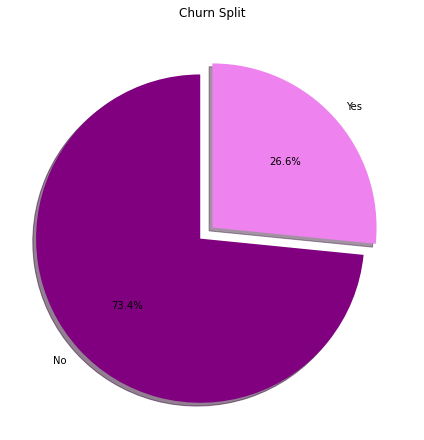

In [101]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(teldata["Churn"]).items())
colors = ['purple', 'violet']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

As we can see, from our data of around 7000 entries, only 26.6% of the customers have churned out. The other 73.4% have stayed with the company.

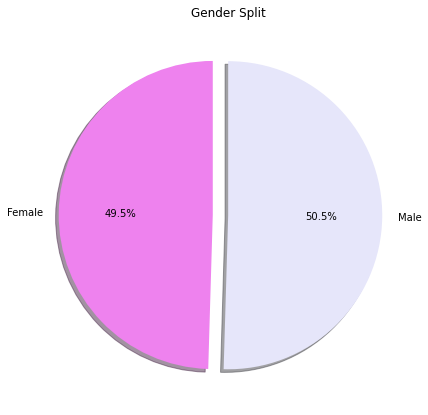

In [102]:
labels, values = zip(*Counter(teldata["gender"]).items())
colors = ['violet', 'lavender']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

As we can see our data is almost split down the middle when comparing the gender split.

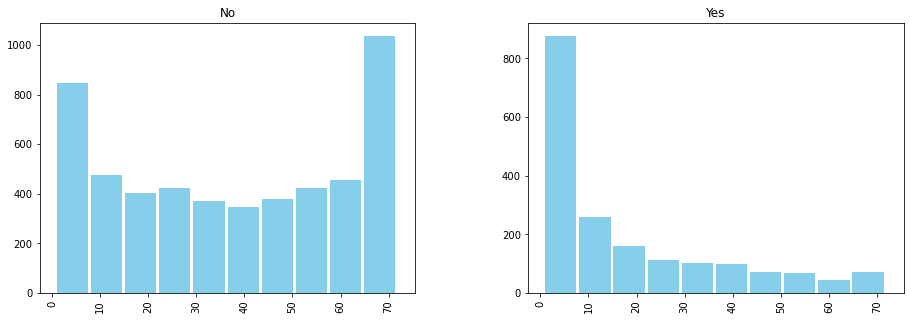

In [103]:
fig=teldata['tenure'].hist(by=teldata['Churn'],figsize=(15,5),width=6.5, color='skyblue' )
plt.show()

As we can see in the first chart, the bars are highest at 70 months & then less than 10 months. This may mean that most customers who stay with the company are either new ones or ones that have been with the company for around 6 years, i.e their most loyal customers.

Our data consist of only 3 features which are continuous and other variables are categorical. For further analysis, we need to encode the categorical data.

In [104]:
from sklearn.preprocessing import LabelEncoder


teldata = teldata.apply(LabelEncoder().fit_transform)
teldata = teldata.drop('customerID',axis=1)
teldata.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1


In order to have a look at the correlation between our variables, we decided to look at the correlation plot using heatmap.

<AxesSubplot:>

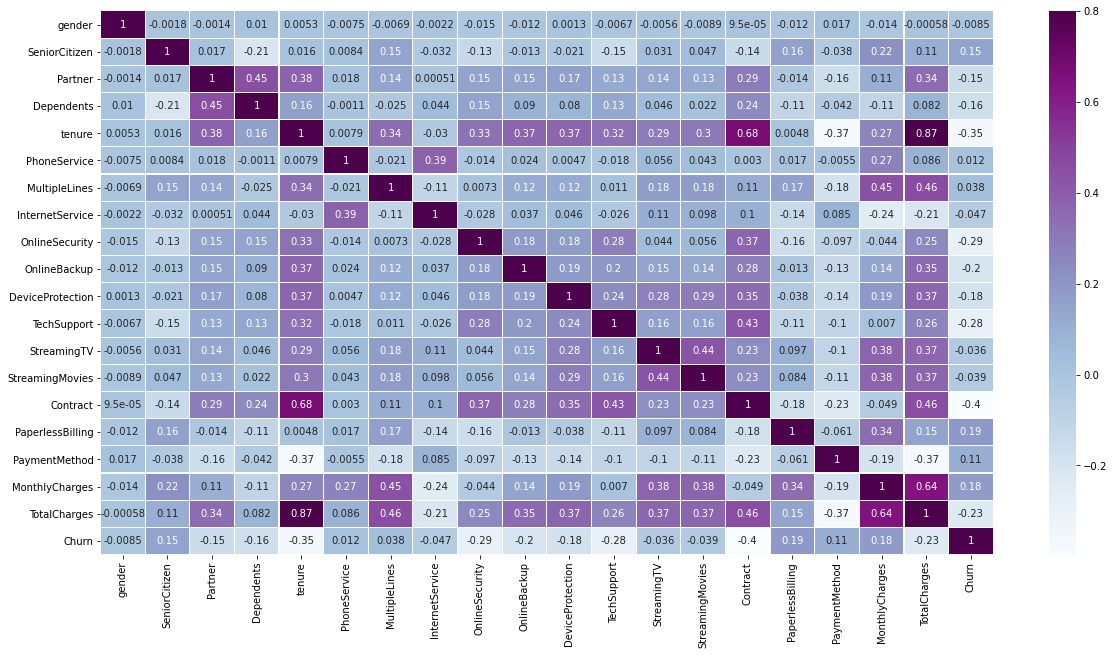

In [105]:
corrmat = teldata.corr()

f, ax = plt.subplots(figsize=(20, 10))

colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.1, cmap = 'BuPu', linecolor = 'White', vmax=0.8, annot=True)

Now we will move to the data preprocessing.

As the first step in our data preprocessing, we split the data into Features & Target. After this we split our data into training, & testing. To bring the variables on the same scale, we standardize the data.

In [106]:
x = teldata.iloc[:,:-2]
y = teldata[["Churn"]]

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

Our dataset consists of 18 features. In order to check whether there are any redundant variables to the model building process.

In [108]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(x_train_std,y_train)
importances = rfc.feature_importances_

f_importances = pd.Series(importances, teldata.columns[:-2])
f_importances.sort_values(ascending=False, inplace=True)
f_importances

MonthlyCharges      0.233021
tenure              0.225098
Contract            0.087561
PaymentMethod       0.063334
TechSupport         0.047610
OnlineSecurity      0.047193
gender              0.033516
OnlineBackup        0.030724
PaperlessBilling    0.029269
Partner             0.027679
DeviceProtection    0.026863
MultipleLines       0.026073
InternetService     0.025465
SeniorCitizen       0.025406
Dependents          0.023294
StreamingMovies     0.021250
StreamingTV         0.020435
PhoneService        0.006208
dtype: float64

Optimal number of features : 18


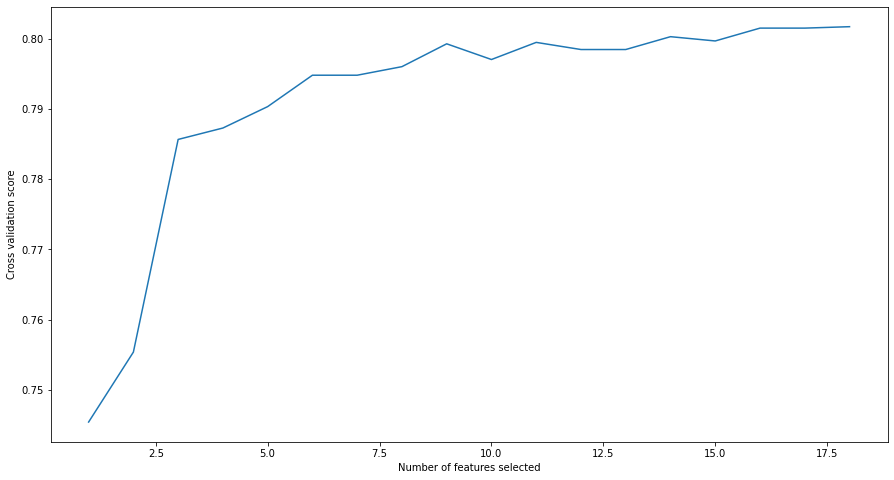

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


lr = LogisticRegression(penalty="l2",C=.1,random_state=0)


selector = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
selector.fit(x_train_std, y_train)

print("Optimal number of features : %d" % selector.n_features_)

plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

As we have selected the 18 features we will further move to model building and comparision.

1. Logistic Regression

In [110]:
lr = LogisticRegression(penalty="l2",C=.1,random_state=0)
lr.fit(x_train_std,y_train)

y_pred_lr = lr.predict(x_test_std)

train_acc_log = round((lr.score(x_train_std, y_train))*100,1)
test_acc_log = round((lr.score(x_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

Training accuracy: 80.4 %
Test accuracy: 80.5 %


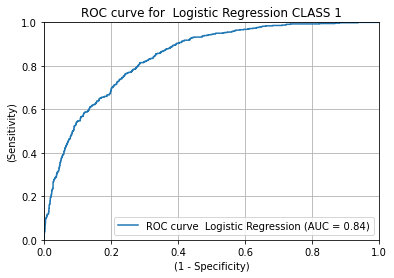

In [112]:
from sklearn.metrics import roc_curve

preds = lr.predict_proba(x_test_std)[:,1]
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_lr,tpr=tpr_lr))
auc_lr = round(metrics.auc(fpr_lr,tpr_lr),2)

plt.plot(fpr_lr, tpr_lr,label='ROC curve  Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  Logistic Regression CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



Text(0.5, 1.0, 'Logistic Regression')

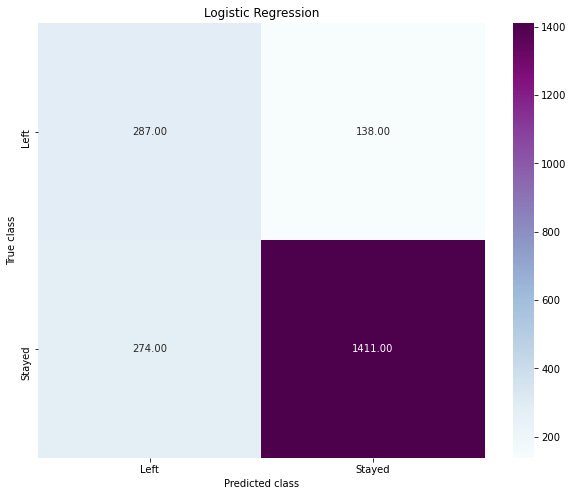

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

from sklearn.metrics import confusion_matrix
import seaborn as sns

logit_cm = metrics.confusion_matrix(y_pred_lr, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = "BuPu")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

Using Logistic Regression model the accuracy is 80.5%.

The model metrics can be seen in the Precision, Recall, F1 Score. On an average, our model had around 80% Precision, Recall & F1 score. It was able to identify the churned customers better than the ones that stay.

2. RandomForest Classifier

In [114]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000,criterion="gini")

rfc.fit(x_train_std,y_train)

y_pred_rfc = rfc.predict(x_test_std)

train_acc_rfc = round((rfc.score(x_train_std, y_train))*100,1)
test_acc_rfc = round((rfc.score(x_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_rfc)
print('Test accuracy: %s %%' % test_acc_rfc)

Training accuracy: 99.7 %
Test accuracy: 79.0 %


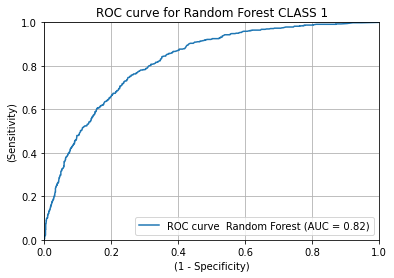

In [115]:
preds = rfc.predict_proba(x_test_std)[:,1]
fpr_rfc, tpr_rfc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_rfc,tpr=tpr_rfc))

auc_rfc = round(metrics.auc(fpr_rfc,tpr_rfc),2)

plt.plot(fpr_rfc, tpr_rfc,label='ROC curve  Random Forest (AUC = %0.2f)' % auc_rfc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Random Forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



Text(0.5, 1.0, 'RFC')

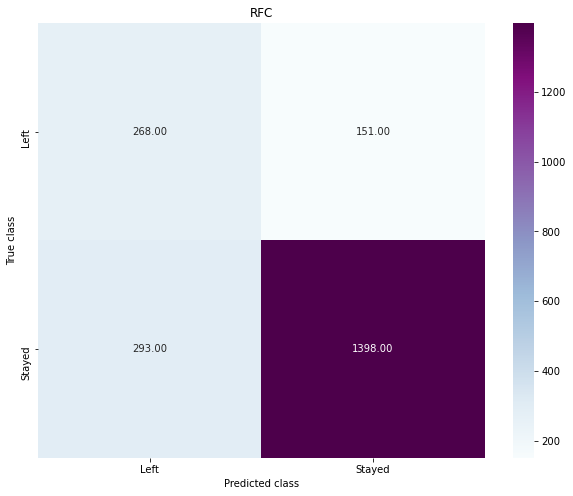

In [116]:
print(classification_report(y_test, y_pred_rfc))


rfc_cm = metrics.confusion_matrix(y_pred_rfc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = 'BuPu')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RFC')

Using RandomForest Classifier model the accuracy is 79%.

3. Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(x_train_std,y_train)

y_pred_dtc = dtc.predict(x_test_std)

train_acc_dtc = round((dtc.score(x_train_std, y_train))*100,1)
test_acc_dtc = round((dtc.score(x_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

Training accuracy: 99.7 %
Test accuracy: 71.6 %


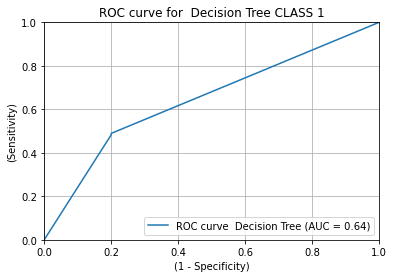

In [118]:
preds = dtc.predict_proba(x_test_std)[:,1]

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_dtc,tpr=tpr_dtc))

auc_dtc = round(metrics.auc(fpr_dtc,tpr_dtc),2)

plt.plot(fpr_dtc, tpr_dtc,label='ROC curve  Decision Tree (AUC = %0.2f)' % auc_dtc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1549
           1       0.47      0.48      0.47       561

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110



Text(0.5, 1.0, 'Decision Tree Classifier')

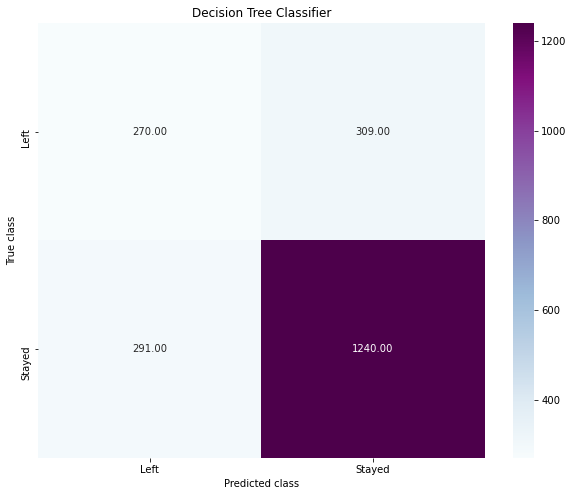

In [119]:
print(classification_report(y_test, y_pred_dtc))

##Confusion matrix

dtc_cm = metrics.confusion_matrix(y_pred_dtc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(dtc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],cmap = 'BuPu')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classifier')

Using Decision Tree Classifier model our accuracy is 71.6%.

4. KNN Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train_std,y_train)

y_pred_knn = knn.predict(x_test_std)

train_acc_knn = round((knn.score(x_train_std, y_train))*100,1)
test_acc_knn = round((knn.score(x_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn)
print('Test accuracy: %s %%' % test_acc_knn)

Training accuracy: 85.9 %
Test accuracy: 73.3 %


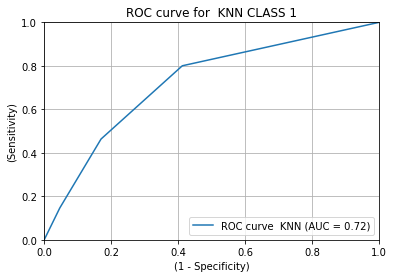

In [121]:
preds = knn.predict_proba(x_test_std)[:,1]

fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_knn,tpr=tpr_knn))

auc_knn = round(metrics.auc(fpr_knn,tpr_knn),2)

plt.plot(fpr_knn, tpr_knn,label='ROC curve  KNN (AUC = %0.2f)' % auc_knn)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1549
           1       0.50      0.46      0.48       561

    accuracy                           0.73      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.73      0.73      2110



Text(0.5, 1.0, 'kNN')

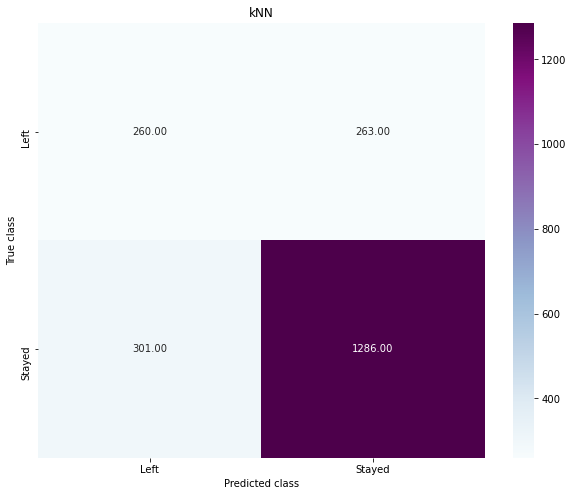

In [122]:
print(classification_report(y_test, y_pred_knn))


knn_cm = metrics.confusion_matrix(y_pred_knn, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = 'BuPu')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('kNN')

Using KNN model our accuracy is 73.3%.

5. Gaussian Naive Bayes Classifier

In [123]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(x_train_std, y_train)

y_pred_gauss = gaussian.predict(x_test_std)

train_acc_gauss = round((gaussian.score(x_train_std, y_train))*100,1)
test_acc_gauss = round((gaussian.score(x_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_gauss)
print('Test accuracy: %s %%' % test_acc_gauss)

Training accuracy: 75.6 %
Test accuracy: 75.9 %


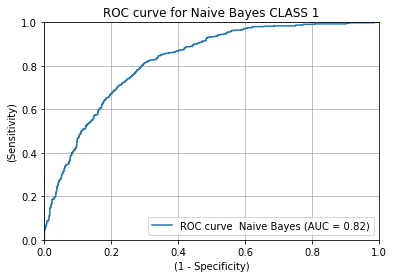

In [124]:
preds = gaussian.predict_proba(x_test_std)[:,1]
fpr_nb, tpr_nb, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_nb,tpr=tpr_nb))

auc_gaussian = round(metrics.auc(fpr_nb,tpr_nb),2)

plt.plot(fpr_nb, tpr_nb,label='ROC curve  Naive Bayes (AUC = %0.2f)' % auc_gaussian)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Naive Bayes CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1549
           1       0.54      0.71      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.76      0.77      2110



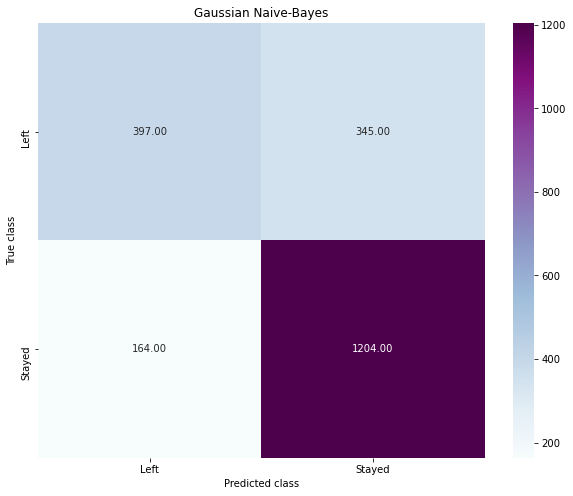

In [125]:
print(classification_report(y_test, y_pred_gauss))

##Confusion matrix

gauss_cm = metrics.confusion_matrix(y_pred_gauss, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(gauss_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = 'BuPu')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gaussian Naive-Bayes')
plt.show()

Gaussian NB model's accuracy is around 75%. The precision, recall & f1 Score lie in the range of 76% to 79%.

Now we will compare all the models to take out the best one.

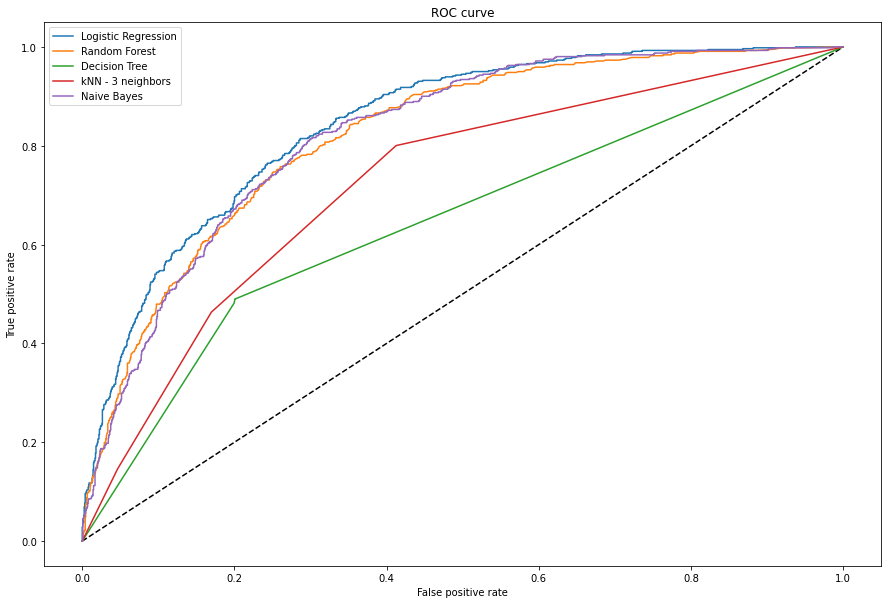

In [126]:
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='kNN - 3 neighbors')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

As we can see, the model with the best ROC curve is the Logistic Regression. Naïve Bayes & Random Forest .

The Decision Model looks to be our worst model.

Saving the model:-

In [127]:
import joblib

joblib.dump(lr,"CustomerChurn")

['CustomerChurn']